## imports

In [1]:
import random
from bloodtype import BloodType

from tqdm import tqdm, trange

import ipdb
import numpy as np
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline
# %matplotlib notebook

In [3]:

random.seed(1234)

## define model


In [4]:
random.seed(1234)
model = BloodType(20000,
                  # deathRate=0.0,
                  # birthRate=0.0,
                  timesteptype='y')

In [5]:
model.set_fitness(fitness={
        'O': 15,
        'A': 1,
        'B': 4,
        'AB': 2
    })


In [6]:
model.steps(100)
model.steps(5, bt_mutation='A')
model.steps(5, bt_mutation='B')
model.steps(100)

model.steps(10, rf_mutation='-')
model.steps(1000)


Population Size 20221, year 99.0: 100%|██████████| 100/100 [01:10<00:00,  1.42it/s]


step: 100.00 [20223, 186, 188, [10075, 10148], [20223, 0, 0, 0], [20223, 0, 0, 0, 0, 0, 0, 0], [1883, 1880, 1879, 1880, 1868, 1868, 1852, 1840, 1798, 1627, 1848]]


Population Size 20231, year 104.0: 100%|██████████| 5/5 [00:03<00:00,  1.33it/s]


step: 105.00 [20233, 186, 188, [10095, 10138], [19293, 940, 0, 0], [19293, 940, 0, 0, 0, 0, 0, 0], [1882, 1881, 1879, 1880, 1876, 1866, 1856, 1857, 1825, 1679, 1752]]


Population Size 20245, year 109.0: 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]


step: 110.00 [20248, 186, 189, [10149, 10099], [18363, 941, 945, 1], [18363, 941, 945, 1, 0, 0, 0, 0], [1885, 1883, 1880, 1879, 1880, 1866, 1868, 1851, 1835, 1731, 1690]]


Population Size 20475, year 209.0: 100%|██████████| 100/100 [01:12<00:00,  1.37it/s]


step: 210.00 [20478, 188, 191, [10164, 10314], [13905, 3465, 3347, 239], [13905, 3465, 3347, 239, 0, 0, 0, 0], [1909, 1905, 1900, 1899, 1900, 1898, 1891, 1889, 1876, 1716, 1695]]


Population Size 20500, year 219.0: 100%|██████████| 10/10 [00:07<00:00,  1.36it/s]


step: 220.00 [20502, 189, 191, [10163, 10339], [13870, 3603, 3289, 260], [13870, 3603, 3289, 260, 0, 0, 0, 0], [1910, 1909, 1904, 1900, 1899, 1899, 1896, 1889, 1881, 1744, 1671]]


Population Size 22926, year 1219.0: 100%|██████████| 1000/1000 [13:22<00:00,  1.25it/s]

step: 1220.00 [22929, 211, 214, [11565, 11364], [15531, 4496, 3180, 278], [15531, 4496, 3180, 278, 479, 110, 111, 9], [2134, 2132, 2130, 2130, 2126, 2121, 2120, 2115, 2097, 1899, 1925]]


In [8]:
prop_bt = model.fitness[model.population['bt_pt']]
prop_bt = prop_bt/np.sum(prop_bt)

prop_age = np.array([model.age_penalty[((model.age_penalty[:, 0] - age) <= 0).sum() - 1, 3]
                        for age in model.population['age']])
prop_age = prop_age/np.sum(prop_age)

prop = np.array(prop_bt * prop_age)
prop = prop / np.sum(prop)

In [11]:
ag = np.array([model.age_penalty[((model.age_penalty[:, 0] - age) <= 0).sum() - 1, 0] for age in model.population['age']])

np.unique(ag)



array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

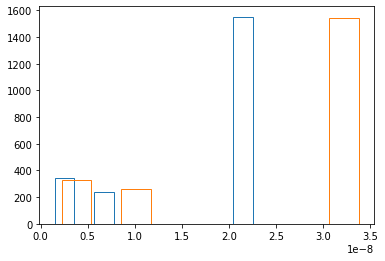

In [20]:
plt.hist(prop[ag==model.age_penalty[0,0]], histtype='step')
plt.hist(prop[ag==model.age_penalty[3,0]], histtype='step')
plt.show()

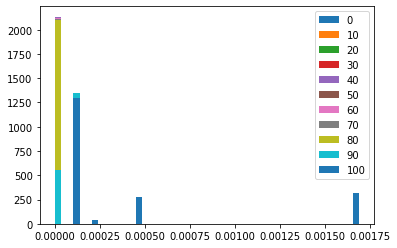

In [30]:

bins = np.linspace(prop.min(),  prop.max(), num=50)
for i in range(model.age_penalty[:,0].shape[0]):
    plt.hist(prop[ag==model.age_penalty[i,0]], bins=bins, histtype='bar', label="{:.0f}".format(model.age_penalty[i,0]))
plt.legend()
plt.show()


In [32]:
death_index = model.get_deathlist()

In [48]:
np.cumsum(np.unique(ag, return_counts=True)[1])

array([ 2134,  4266,  6396,  8526, 10652, 12773, 14893, 17008, 19105,
       21004, 22929])

In [67]:
xyz = np.append(model.age_penalty[:,0], model.age_penalty[-1,0]+10)
xyz

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
       110.])

In [61]:
ag_bins = list(model.age_penalty[:,0])+[model.age_penalty[-1,0]+10]
ac = np.histogram(ag, bins=ag_bins)[0]

In [71]:
da = [model.population['age'][i] for i in death_index]


In [80]:
dbt = [model.population['bt_pt'][i] for i in death_index]
bt = np.unique(model.population['bt_pt'], return_counts=True)


dbt_counts = np.unique(dbt, return_counts=True)

dbt_counts, bt, dbt_counts[1]/bt[1]

((array(['A', 'AB', 'B', 'O'], dtype='<U2'), array([ 28,   1,  36, 146])),
 (array(['A', 'AB', 'B', 'O'], dtype=object),
  array([ 4218,   278,  2902, 15531])),
 array([0.00663822, 0.00359712, 0.01240524, 0.00940055]))

In [70]:
np.histogram(model.population['age'], bins=ag_bins)[0]

array([2134, 2132, 2130, 2130, 2126, 2121, 2120, 2115, 2097, 1899,  794])

In [65]:
np.histogram(da, bins=ag_bins)

(array([  0,   0,   0,   0,   0,   0,   1,   0,   4,  45, 128]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110.]))

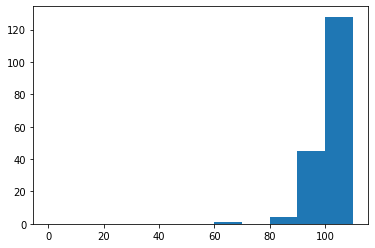

In [63]:
plt.hist(da, bins=ag_bins)
plt.show()

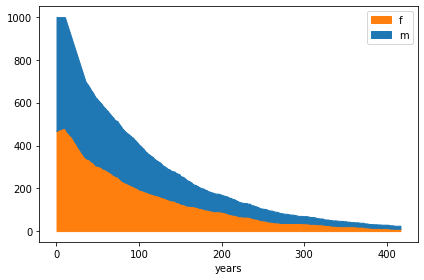

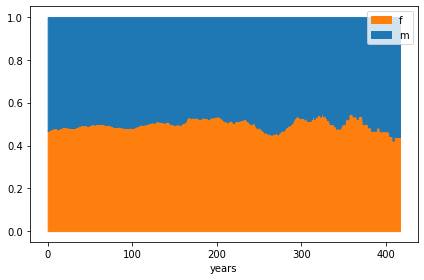

In [ ]:
model.set_death_rate(value=2*BloodType.deathRate)
model.steps(5)

model.set_death_rate(value=BloodType.deathRate)
model.set_birth_rate(value=2*BloodType.birthRate)
model.steps(10)

model.set_birth_rate(value=BloodType.birthRate)
model.steps(10)

model.steps(2000)

In [ ]:
model.plot_size(save=True)
model.plot_size(cumulativ=True, save=True)
model.plot_sex(save=True)
model.plot_sex(ratio=True, save=True)
model.plot_bt_pt(save=True)
model.plot_bt_pt(showRf=True, save=True)
model.plot_bt_pt(ratio=True, save=True)
model.plot_bt_pt(showRf=True, ratio=True, save=True)
model.plot_age_groups(ratio=False, save=True)
model.plot_age_groups(ratio=True, save=True)
model.save_states()

In [ ]:
# model.plot_size(save=True), model.plot_size(cumulativ=True, save=True), model.plot_sex(save=True), model.plot_sex(ratio=True, save=True), model.plot_bt_pt(save=True), model.plot_bt_pt(showRf=True, save=True), model.plot_bt_pt(ratio=True, save=True), model.plot_bt_pt(showRf=True, ratio=True, save=True), model.plot_age_groups(ratio=False, save=True), model.plot_age_groups(ratio=True, save=True), model.save_states()